In [51]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Verilerimizi csv dosyasından okuyup np arraylerine atayalım

In [52]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [53]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

937


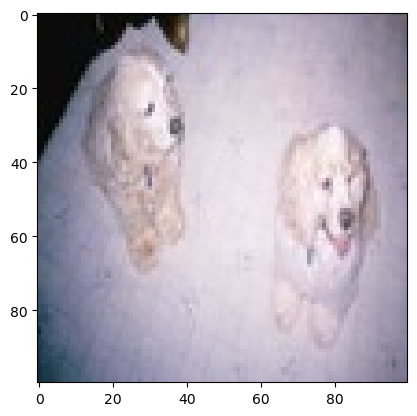

In [54]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
print(idx)
plt.show()

# Modelimizi oluşturup eğitelim


In [55]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [56]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [57]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [58]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 1s 37ms/step - loss: 0.7037 - accuracy: 0.5465
Epoch 2/15
32/32 [==============================] - 1s 36ms/step - loss: 0.6499 - accuracy: 0.6320
Epoch 3/15
32/32 [==============================] - 1s 36ms/step - loss: 0.5896 - accuracy: 0.6910
Epoch 4/15
32/32 [==============================] - 1s 36ms/step - loss: 0.5192 - accuracy: 0.7495
Epoch 5/15
32/32 [==============================] - 1s 36ms/step - loss: 0.4580 - accuracy: 0.7865
Epoch 6/15
32/32 [==============================] - 1s 36ms/step - loss: 0.4146 - accuracy: 0.8185
Epoch 7/15
32/32 [==============================] - 1s 36ms/step - loss: 0.3499 - accuracy: 0.8505
Epoch 8/15
32/32 [==============================] - 1s 38ms/step - loss: 0.3236 - accuracy: 0.8585
Epoch 9/15
32/32 [==============================] - 1s 36ms/step - loss: 0.2678 - accuracy: 0.8895
Epoch 10/15
32/32 [==============================] - 1s 36ms/step - loss: 0.2146 - accuracy: 0.9160
Epoch 11/

In [59]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 10ms/step - loss: 1.0837 - accuracy: 0.6900


[1.0836864709854126, 0.6899999976158142]

# rastgele bir görüntü verip tahmine bakalım

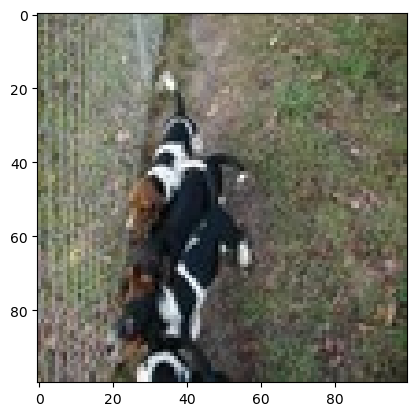

1/1 [==============================] - 0s 14ms/step
Our model says it is a : cat


In [62]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Modelin çıktısı:", pred)